In [ ]:
import numpy as np
import matplotlib.pyplot as plt

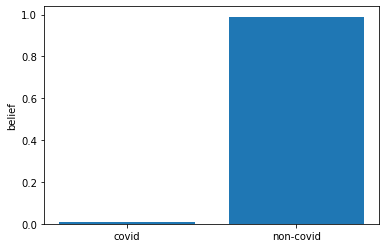

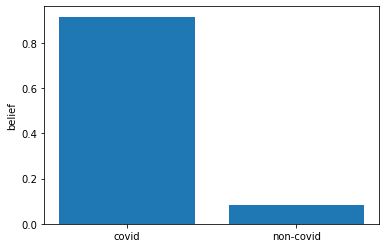

{'covid': 0.9151024297284421, 'non-covid': 0.08489757027155787}


In [ ]:
class CovidTest:
    def __init__(self, hypoSet):
        self.hypoSet = hypoSet

    def update(self, d):
        # cập nhật cho từng hypothesis h
        s = 0
        for h in self.hypoSet.keys():
            self.hypoSet[h] = self.likelihood(h, d) * self.hypoSet[h]
            s += self.hypoSet[h]
        # chuẩn hóa niềm tin cho tất cả hypothesis h
        for h in self.hypoSet.keys():
            self.hypoSet[h] /= s

    def likelihood(self, h, d):
        if h=='covid':
            if d=='pos': return 0.98
            if d=='neg': return 0.02
        if h=='non-covid':
            if d=='pos': return 0.03
            if d=='neg': return 0.97

    def plot(self):
        x = list(self.hypoSet.keys())
        y = list(self.hypoSet.values())
        plt.bar(x, y)
        plt.ylabel('belief')
        plt.show()

hypoSet = {'covid': 0.01, 'non-covid': 0.99}
model = CovidTest(hypoSet)
model.plot()
model.update('pos')
model.update('pos')
model.plot()
print(model.hypoSet)